In [10]:
from sklearn.neighbors import KNeighborsClassifier # <-- Add this line
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
# Initialize the KNN classifier with Euclidean distance
knn_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

# Train the model
knn_euclidean.fit(X_train, y_train)

# Make predictions
y_pred = knn_euclidean.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Euclidean distance: {accuracy:.4f}")

Accuracy with Euclidean distance: 1.0000


In [12]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split # <-- Add this import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a synthetic dataset
X_synth, y_synth = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Simulate a grid structure by rounding
X_grid = X_synth.round()

# Now, this line will work correctly
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_grid, y_synth, test_size=0.3, random_state=42)


### Why is Euclidean distance appropriate for this dataset? 
The features of the Iris dataset (like petal length and sepal width) are continuous measurements in a real-valued space. Euclidean distance is a natural choice because it measures the actual geometric, straight-line distance between points, which is a meaningful way to determine similarity for this kind of physical data.


### How would changing k affect your accuracy? 
Changing 'k' involves a trade-off:

A small k (like 1) makes the model highly sensitive to noise and outliers. It can lead to overfitting, where the model learns the training data too well but doesn't generalize to new data.

A large k makes the model smoother and less affected by individual points. However, if 'k' is too large, it can underfit, missing local patterns and becoming too simplistic. You'll explore this trade-off in Part 4.

In [13]:
# Initialize the classifier with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

# Train, predict, and evaluate
knn_manhattan.fit(X_train_g, y_train_g)
y_pred_g = knn_manhattan.predict(X_test_g)
accuracy_g = accuracy_score(y_test_g, y_pred_g)
print(f"Accuracy with Manhattan distance: {accuracy_g:.4f}")

Accuracy with Manhattan distance: 0.8500


### Why is Manhattan distance more suitable here? 
For data on a grid, movement is typically restricted to horizontal and vertical steps. Manhattan distance perfectly captures this constraint, measuring the path along the grid lines. Euclidean distance would measure a diagonal "shortcut" that isn't a valid path within the grid's structure.


### What happens if you use Euclidean distance instead? 
Using Euclidean distance on the grid-like data would still work, but it might be less intuitive. It would calculate the "as the crow flies" distance, ignoring the grid path. This could lead to different neighbors being chosen and potentially a less accurate or less representative model for this specific type of data structure.

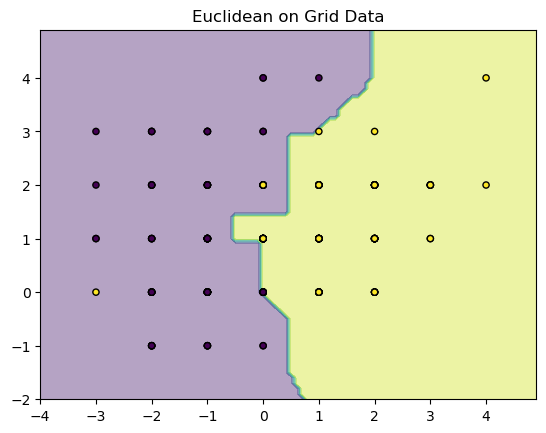

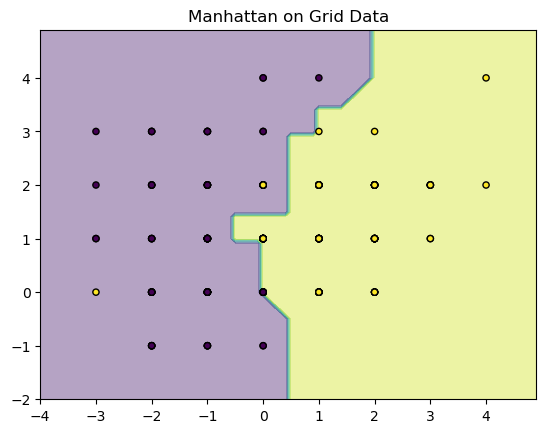

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, X, y, title):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict on the mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and the data points
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.show()

# Train a Euclidean model on the grid data for comparison
knn_euclidean_grid = KNeighborsClassifier(n_neighbors=5, metric='euclidean').fit(X_train_g, y_train_g)
# Train a Manhattan model on the grid data
knn_manhattan_grid = KNeighborsClassifier(n_neighbors=5, metric='manhattan').fit(X_train_g, y_train_g)


# Plot the boundaries
plot_decision_boundary(knn_euclidean_grid, X_grid, y_synth, "Euclidean on Grid Data")
plot_decision_boundary(knn_manhattan_grid, X_grid, y_synth, "Manhattan on Grid Data")

### How does the choice of distance metric affect the shape of the boundary? 

Euclidean: The decision boundaries are generally smooth and curved. The set of points equidistant from two other points is a straight line, leading to these rounded shapes.

Manhattan: The decision boundaries are jagged and axis-aligned, forming steps or blocks. This reflects the "city block" calculation, which creates different equidistant zones.



The boundary is drawn where the model's prediction changes. This happens at points that are equidistant from the nearest neighbors of two different classes. Because the definition of distance is different for each metric, the set of equidistant points (and thus the boundary) has a different shape.

The shape of the boundary is a direct result of how each metric calculates "distance." The boundary is drawn at the points where the model is uncertain—where a point is essentially equidistant from the nearest neighbors of two different classes.

Why the Euclidean boundary is smooth: Euclidean distance measures the shortest, straight-line path between two points ("as the crow flies"). The set of points that are equidistant from two neighbors of different classes forms a straight line (a perpendicular bisector). When you combine the influence of all the neighbors, these lines create the smooth, curved boundary you see.

Why the Manhattan boundary is blocky: Manhattan distance calculates distance by moving only horizontally or vertically ("like a taxi in a city"). Because diagonal movement is not allowed, the set of points equidistant from two neighbors forms a shape made of axis-aligned segments. This constraint forces the decision boundary to follow the grid, resulting in the characteristic blocky, stair-step appearance. It perfectly reflects the underlying structure of your grid-like data.

Shape of Training Data: (105, 4)
Shape of Test Data: (45, 4)
k=1, Accuracy=1.0000
k=2, Accuracy=1.0000
k=10, Accuracy=1.0000
k=42, Accuracy=0.9778
k=100, Accuracy=0.2889


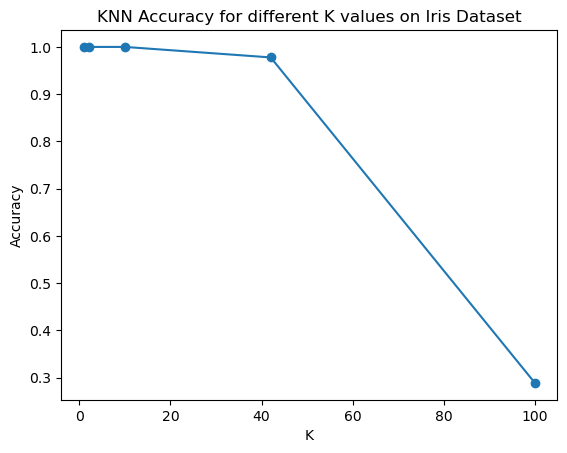

In [21]:
print("Shape of Training Data:", X_train.shape)
print("Shape of Test Data:", X_test.shape)


k_values = [ 1, 2, 10, 42, 100] # 
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"k={k}, Accuracy={accuracy:.4f}")

# Plot the results
plt.plot(k_values, accuracies, marker='o')
plt.title("KNN Accuracy for different K values on Iris Dataset")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

with the values in the home work (1,3,5,7,15) the accuracy was just 1,i tried with bigger values 42,100 and it changes